In [507]:
import math
import numpy as np
import json
import io
import cv2
import matplotlib.pyplot as plt

In [508]:
json_file = r'D:\datasets\test\gt_zao2.json'
image_file = r'D:\datasets\test\zao2.jpg'
f = open(json_file,'r')
coco_json = json.load(f)
image = cv2.imread(image_file)
print(image.shape)

(690, 750, 3)


In [509]:
test_value = coco_json['shapes'][0]['points']
test_value

[[34.90243902439022, 469.73170731707313],
 [72.70731707317071, 406.3170731707317],
 [155.6341463414634, 370.9512195121951],
 [239.78048780487802, 352.6585365853658],
 [323.92682926829264, 357.5365853658536],
 [383.68292682926824, 383.1463414634146],
 [415.390243902439, 433.1463414634146],
 [421.4878048780487, 494.12195121951214],
 [399.5365853658536, 550.2195121951219],
 [342.21951219512187, 596.560975609756],
 [251.97560975609753, 624.6097560975609],
 [144.65853658536582, 624.6097560975609],
 [78.80487804878044, 601.4390243902438],
 [50.756097560975604, 561.1951219512194],
 [50.756097560975604, 534.3658536585366],
 [34.90243902439022, 483.1463414634146]]

In [510]:
cnt = np.float32(test_value)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
angle = rect[2]
cv2.drawContours(image, [box], 0, (255, 0, 0), 2)
print(box)
print(angle)

[[ 73 663]
 [ 15 401]
 [390 319]
 [447 582]]
-12.26478099822998


In [511]:
#calc_bearing是一个用arctan求θ的简单函数。你必须把函数封装起来以确保w和h是正的，并且theta在-pi/2到pi/2或者-pi到pi的范围内。
def calc_bearing(pointA, pointB):
    delta_x = -abs(pointA[0]-pointB[0])
    delta_y = -abs(pointA[1]-pointB[1])
    if delta_x<delta_y:
        bearing = math.atan2(delta_x,delta_y)
    else:
        bearing = math.atan2(delta_y,delta_x)
    return bearing

In [512]:
def _corners2rotatedbbox(corners):
   centre = np.mean(np.array(corners), 0)
#    theta = calc_bearing(corners[2], corners[3])
   theta = calc_bearing(corners[1], corners[2])
   rotation = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
   out_points = np.matmul(corners - centre, rotation) + centre
   x, y = list(out_points[0,:])
   w, h = list(out_points[2, :] - out_points[0, :])
   return [x, y, w, h, theta]

In [513]:
rbox = _corners2rotatedbbox(box)
rbox

[97.26973982253321,
 299.963788048437,
 268.3421692666238,
 383.16769200088174,
 -1.7860744973055906]

In [514]:
bbox2 = [[rbox[0],rbox[1]],[rbox[0],rbox[1]+rbox[3]],[rbox[0]+rbox[2],rbox[1]+rbox[3]],[rbox[0]+rbox[2],rbox[1]]]

In [515]:
bbox2 = np.int0(bbox2)
cv2.drawContours(image, [bbox2], 0, (255, 0, 0), 2)

array([[[245, 250, 253],
        [245, 250, 253],
        [245, 250, 253],
        ...,
        [ 80, 192, 212],
        [ 80, 192, 212],
        [ 79, 192, 212]],

       [[245, 250, 253],
        [245, 250, 253],
        [245, 250, 253],
        ...,
        [ 80, 192, 212],
        [ 79, 192, 212],
        [ 79, 192, 212]],

       [[246, 251, 254],
        [246, 251, 254],
        [246, 251, 254],
        ...,
        [ 80, 193, 213],
        [ 80, 193, 213],
        [ 78, 193, 213]],

       ...,

       [[130, 187, 242],
        [131, 187, 242],
        [134, 188, 241],
        ...,
        [193, 224, 255],
        [196, 225, 255],
        [195, 224, 255]],

       [[132, 188, 243],
        [133, 189, 244],
        [138, 192, 245],
        ...,
        [191, 225, 254],
        [191, 226, 252],
        [191, 226, 252]],

       [[133, 189, 244],
        [135, 191, 246],
        [139, 193, 246],
        ...,
        [189, 226, 252],
        [189, 227, 251],
        [189, 227, 251]]

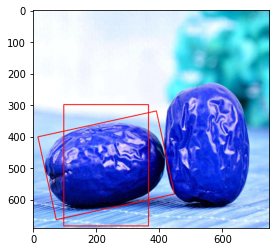

In [516]:
plt.imshow(image)

In [517]:
cv2.imwrite('test.jpg',image)

True

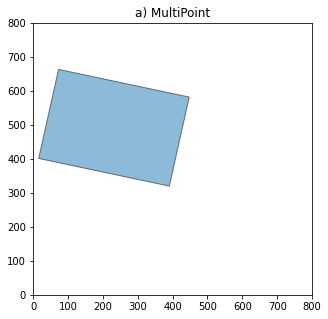

In [520]:
from shapely.geometry import MultiPoint, Polygon, LineString
import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

plt.xlim((0,800))
plt.ylim((0,800))

mp = MultiPoint(test_value)
rect = mp.minimum_rotated_rectangle

patch = PolygonPatch(rect, alpha=0.5, zorder=2)
ax.add_patch(patch)
ax.set_title('a) MultiPoint')


plt.show()